In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import sys
sys.path.append('../..')
from utils.workflow import WorkflowModel
from utils.data import RK4DataGenerator
from utils.eval import eval_predictions

2025-12-07 22:36:57.175829: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
Using backend: tensorflow
Other supported backends: tensorflow.compat.v1, pytorch, jax, paddle.
paddle supports more examples now and is recommended.
Enable just-in-time compilation with XLA.



Set the default float type to float64


In [2]:
df = pd.read_csv("../../data/influenza_england_1978_school.csv")
df.shape

(14, 3)

In [3]:
I_data = df["in_bed"].to_numpy()

def double_data(data):
    avg_arr = ((data + np.roll(data, -1))/2.0)
    return np.vstack([data, avg_arr]).flatten('F')[:-1]

I_data = double_data(I_data)
I_data

array([  3. ,   5.5,   8. ,  17. ,  26. ,  51. ,  76. , 150.5, 225. ,
       261.5, 298. , 278. , 258. , 245.5, 233. , 211. , 189. , 158.5,
       128. ,  98. ,  68. ,  48.5,  29. ,  21.5,  14. ,   9. ,   4. ])

In [4]:
# beta_t = lambda x: 0.85 * x
# rk4data = RK4DataGenerator(beta_t, 0.447, 0, 13)
# I_data = rk4data.generate(nop=50, noise_std=0.1)[:,1] * 763

In [ ]:
t_0, t_f = 0, 13
N = 763
gamma = 0.454
train_t = np.linspace(t_0, t_f, len(I_data))
model = WorkflowModel(t_0, t_f, I_data, train_t, N, gamma, scaling="norm")

2025-12-07 22:36:59.588504: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
I0000 00:00:1765157819.589263  250852 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2589 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5


Compiling model...
'compile' took 0.003747 s



In [ ]:
model.S0, model.I0, model.R0 

In [6]:
model.train()

Training model...



2025-12-07 22:37:01.778333: I external/local_xla/xla/service/service.cc:163] XLA service 0x55c2ae4c62f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-12-07 22:37:01.778352: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2025-12-07 22:37:01.803171: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-12-07 22:37:01.895445: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91002
I0000 00:00:1765157823.044371  250852 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


Step      Train loss                                                                          Test loss                                                                           Test metric
0         [3.64e-03, 8.08e-02, 2.98e-02, 1.55e-01, 9.92e-01, 1.55e-05, 0.00e+00, 1.05e-01]    [3.18e-03, 6.97e-02, 2.72e-02, 1.06e-01, 9.92e-01, 1.55e-05, 0.00e+00, 9.71e-02]    []  
100       [1.16e-02, 8.09e-03, 1.16e-02, 3.62e-03, 7.03e-02, 1.30e-02, 7.41e-05, 2.25e-02]    [7.96e-03, 4.84e-03, 6.30e-03, 4.28e-04, 7.01e-02, 1.31e-02, 3.16e-05, 1.98e-02]    []  
200       [5.70e-03, 4.98e-03, 9.73e-04, 2.02e-03, 3.58e-04, 8.03e-04, 1.91e-05, 2.68e-02]    [5.10e-03, 3.14e-03, 6.80e-04, 2.27e-04, 2.15e-04, 2.59e-04, 1.14e-05, 2.66e-02]    []  
300       [3.48e-03, 4.43e-03, 4.93e-04, 2.60e-03, 2.81e-05, 7.92e-04, 3.28e-04, 2.68e-02]    [2.92e-03, 2.43e-03, 2.99e-04, 2.73e-04, 5.01e-05, 1.68e-04, 3.14e-06, 2.72e-02]    []  
400       [2.33e-03, 4.57e-03, 7.02e-04, 3.93e-03, 6.67e-05, 1.32e-04, 1.15e-0

(<deepxde.model.LossHistory at 0x7f9ecc845e50>,
 <deepxde.model.TrainState at 0x7f9ecc849010>)

In [7]:
model.I0

np.float64(0.003931847968545216)

In [8]:
test_t = np.linspace(t_0, t_f, 50)
pred = model.predict(test_t)


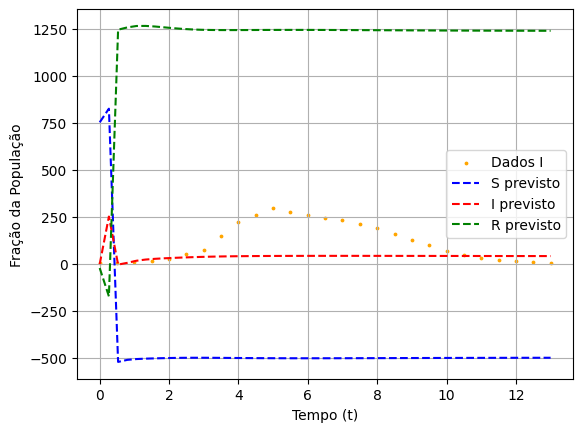

In [9]:
S_pred = pred[:,0]
I_pred = pred[:,1]
R_pred = pred[:,2]

plt.scatter(train_t, I_data, label="Dados I", color="orange", s=3)

plt.plot(test_t, S_pred, label="S previsto", linestyle="--", color="blue")
plt.plot(test_t, I_pred, label="I previsto", linestyle="--", color="red")
plt.plot(test_t, R_pred, label="R previsto", linestyle="--", color="green")

plt.xlabel("Tempo (t)")
plt.ylabel("Fração da População")

plt.legend()
plt.grid()

plt.show()

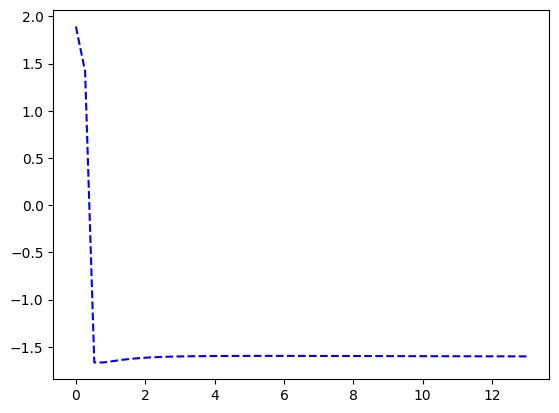

In [10]:
beta_pred = pred[:,3]
plt.plot(test_t, beta_pred, label="Beta previsto", linestyle="--", color="blue")
# plt.plot(test_t, beta_t(test_t), label="Beta", linestyle="--", color="red")
plt.show()